<a href="https://colab.research.google.com/github/CristianVeloz0501/DMC/blob/main/Housing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats

import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

# Importar datos

In [2]:
Data = pd.read_csv('/content/HousingData 2.csv',encoding='latin1')

# Exploracion de datos

Se puede usar el head, sample, tail para observar valores de la tabla

In [ ]:
Data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
Data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
Data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
394,NaN,0.0,18.10,0.0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35,12.7
453,8.24809,0.0,NaN,0.0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
237,0.51183,0.0,6.20,0.0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
19,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
Data.shape

(506, 14)

In [ ]:
DataT=Data.transpose()

In [ ]:
DataT

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004,...,0.2896,0.26838,0.23912,0.17783,0.22438,0.06263,0.04527,0.06076,0.10959,0.04741
ZN,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000,...,9.6900,9.69000,9.69000,9.69000,9.69000,11.93000,11.93000,11.93000,11.93000,11.93000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,0.00000,0.00000,NaN,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400,...,0.5850,0.58500,0.58500,0.58500,0.58500,0.57300,0.57300,0.57300,0.57300,0.57300
RM,6.57500,6.42100,7.18500,6.99800,7.14700,6.43000,6.01200,6.17200,5.63100,6.00400,...,5.3900,5.79400,6.01900,5.56900,6.02700,6.59300,6.12000,6.97600,6.79400,6.03000
AGE,65.20000,78.90000,61.10000,45.80000,54.20000,58.70000,66.60000,96.10000,100.00000,85.90000,...,72.9000,70.60000,65.30000,73.50000,79.70000,69.10000,76.70000,91.00000,89.30000,NaN
DIS,4.09000,4.96710,4.96710,6.06220,6.06220,6.06220,5.56050,5.95050,6.08210,6.59210,...,2.7986,2.89270,2.40910,2.39990,2.49820,2.47860,2.28750,2.16750,2.38890,2.50500
RAD,1.00000,2.00000,2.00000,3.00000,3.00000,3.00000,5.00000,5.00000,5.00000,5.00000,...,6.0000,6.00000,6.00000,6.00000,6.00000,1.00000,1.00000,1.00000,1.00000,1.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000,222.00000,311.00000,311.00000,311.00000,311.00000,...,391.0000,391.00000,391.00000,391.00000,391.00000,273.00000,273.00000,273.00000,273.00000,273.00000


In [ ]:
Data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
DataT.describe()

In [ ]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


# Ordenamiento

In [ ]:
Dataord=Data.sort_values(by=['MEDV'],ascending=False)
Dataord

# Analisis con graficos

In [ ]:
sbn.displot(Data)
plt.show()


# Seleccion de variable a analizar

La variable analizada o target es:
medv : Valor medio de las viviendas ocupadas por sus propietarios en $ 1000.

Se puede ir graficando las variables de la tabla para analizar si los datos requieren de eliminacion de outliers o relleno de missings

In [ ]:
Data.hist(bins=50, figsize=(20,15))
plt.show()

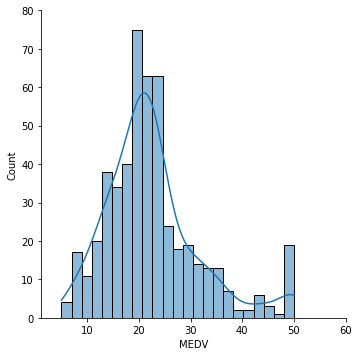

In [ ]:
sbn.displot(Data['MEDV'],kde=True)
plt.xlim(1,60)
plt.ylim(0,80)
plt.show()

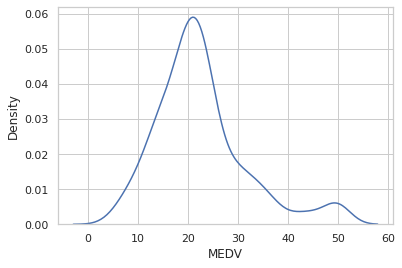

In [ ]:
sbn.kdeplot(Data['MEDV'])

plt.show()

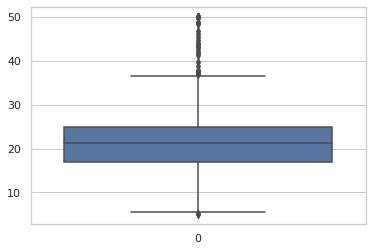

In [ ]:
sbn.set_theme(style="whitegrid")
sbn.boxplot(data=Data.MEDV, orient="v")
plt.show()

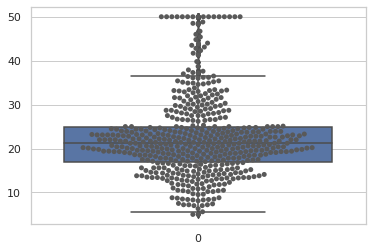

In [ ]:
ax=sbn.boxplot(data=Data.MEDV, orient="v")
sbn.swarmplot(data=Data.MEDV, color=".35")
plt.show()

# Funcion para graficar

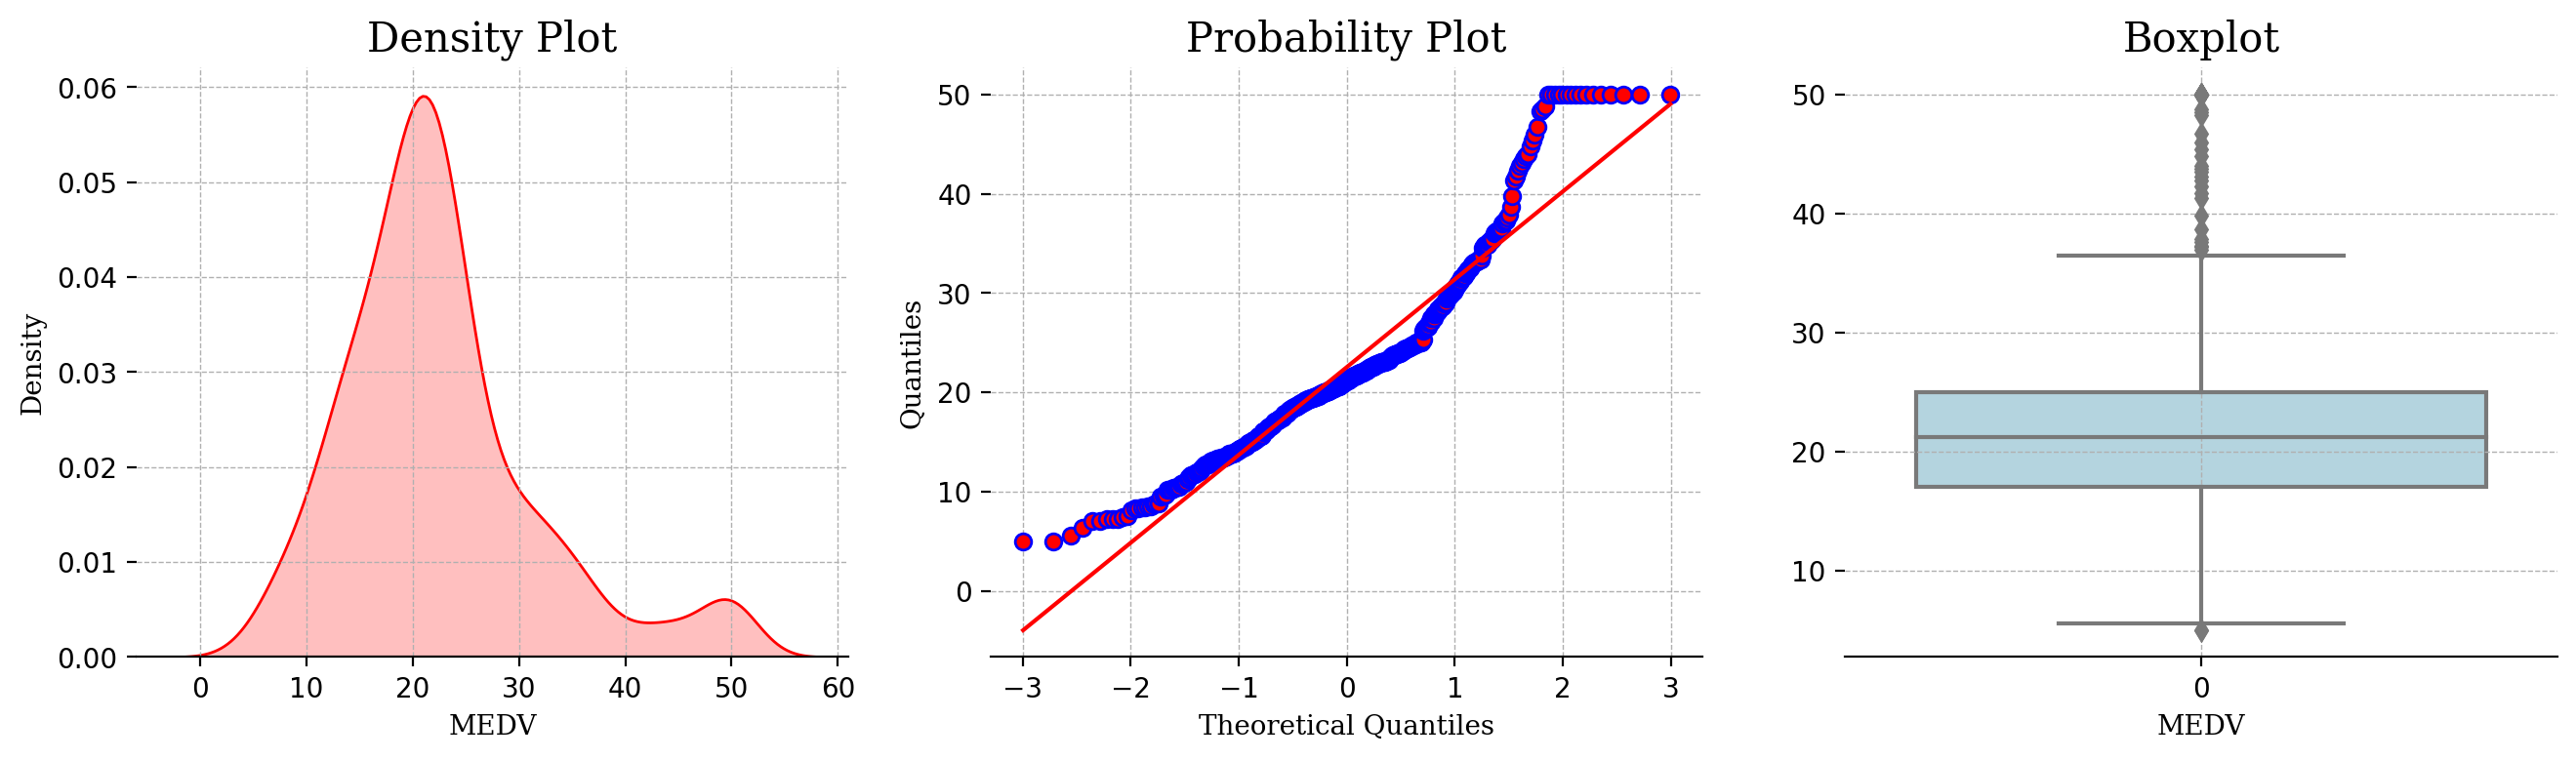

In [3]:
def graficar (data, variable):
  plt.figure(figsize=(16, 4), dpi=200)

  # histogram
  ax = plt.subplot(1, 3, 1)
  sbn.kdeplot(data[variable], color='Red', fill=True)
  ax.set_title("Density Plot", fontsize=15, fontweight='normal', fontfamily='serif')
  plt.ylabel('Density', fontfamily='serif')
  plt.xlabel(variable, fontfamily='serif')
  plt.grid(True, linestyle = '--', linewidth = 0.5)

  for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

  #Q - Q plot

  ax = plt.subplot(1,3,2)
  stats.probplot(data[variable], dist="norm", plot=plt)
  ax.get_lines()[0].set_markerfacecolor('r')
  ax.set_title("Probability Plot", fontsize=15, fontweight='normal', fontfamily='serif')
  plt.ylabel('Quantiles', fontfamily='serif')
  plt.xlabel('Theoretical Quantiles', fontfamily='serif')
  plt.grid(True, linestyle = '--', linewidth = 0.5)

  for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

  # Box
  ax=plt.subplot(1,3,3)
  sbn.boxplot(data=data[variable], color='Lightblue',orient='v')
  ax.set_title("Boxplot", fontsize=15, fontweight='normal', fontfamily='serif')
  plt.xlabel(variable, fontfamily='serif')
  plt.grid(True, linestyle = '--', linewidth = 0.5)

  for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

graficar(Data, 'MEDV')

# Relacionamos variables

Buscamos la correlacion entre variables

In [ ]:
corr_matrix = Data.corr(method='pearson')
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


# Funciones para eliminacion de Outliers

Outlier = mean +/- 3* std.

However, since our variable is skewed, the general statistical approach is by calculating the quantiles then the inter-quartile range.

IQR = 75th quantile - 25th quanitile.
An outlier will sit outside the following upper and lower boundaries:

UPPER : 75th quantile + (IQR * 1.5)

LOWER : 25th quanitile - (IQR * 1.5)

El limite inferior es: 28.9875 & El limite superior es: 36.962500000000006


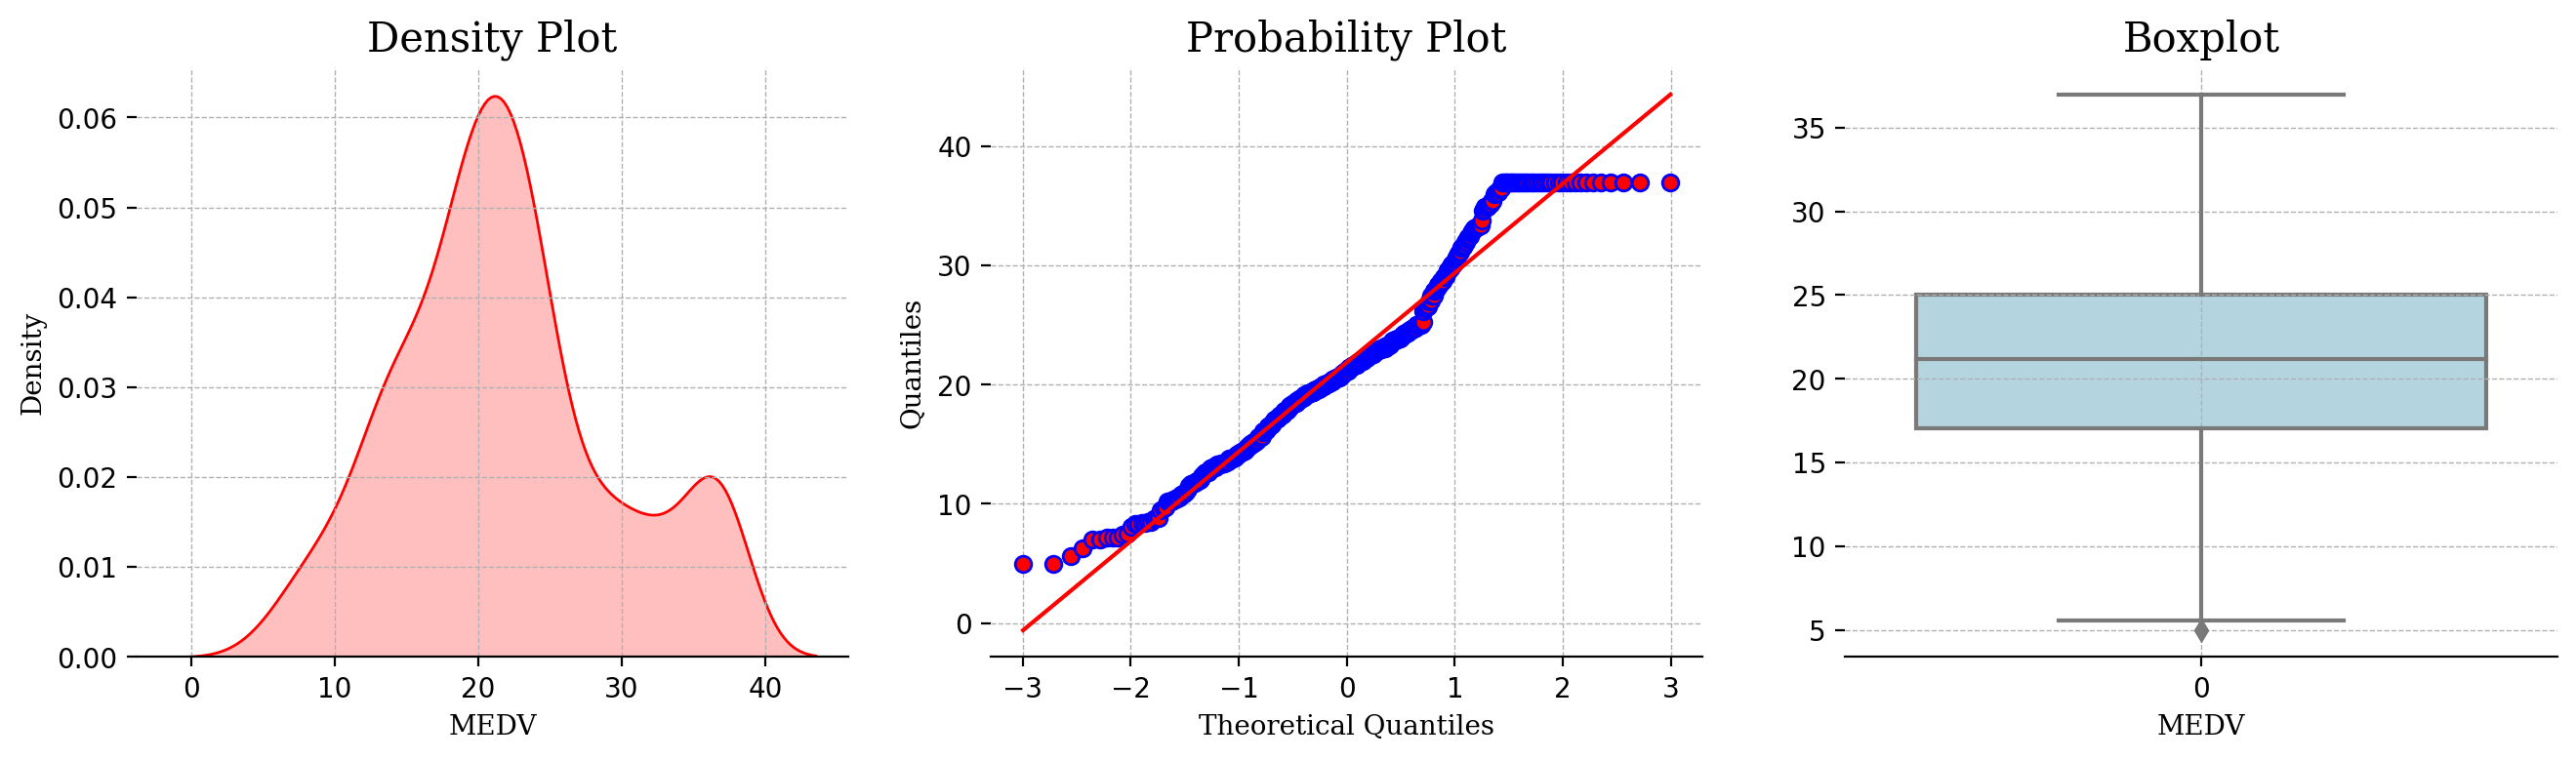

In [4]:
def find_outlier (data,variable,desviacion):
  IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

  UP = data[variable].quantile(0.75) + (IQR * desviacion)
  LW = data[variable].quantile(0.25) + (IQR * desviacion)

  return UP,LW

upper_limiter, lower_limiter =find_outlier(Data,'MEDV',1.5)
print(f"El limite inferior es: {lower_limiter} & El limite superior es: {upper_limiter}")

Data.loc[Data['MEDV']>upper_limiter,'MEDV']=upper_limiter
#Data.loc[Data['MEDV']<10.0,'MEDV']=10.0

graficar(Data,'MEDV')


In [ ]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


# Pruebas
Buscador loc

In [ ]:
lista=pd.DataFrame({"Nombre":['Carlos','Alejandro','Mishell','Noemi'],
                    "Edad":[24,21,26,np.NaN],"Profesion":['carpintero','vendedor','cantante','actriz']})

lista

,Nombre,Edad,Profesion
0,Carlos,24.0,carpintero
1,Alejandro,21.0,vendedor
2,Mishell,26.0,cantante
3,Noemi,NaN,actriz


In [ ]:
num=25
lista.loc[lista["Edad"]>=num,"Edad"]=num
lista

In [ ]:
lista.loc[:,["Edad"]]

In [ ]:
lista=shuffle(lista,random_state=6)
lista

,Nombre,Edad,Profesion
1,Alejandro,21.0,vendedor
2,Mishell,26.0,cantante
3,Noemi,NaN,actriz
0,Carlos,24.0,carpintero


In [ ]:
features = list(set(lista.columns.tolist()) - set(['Edad']))
features

['Profesion', 'Nombre']

In [ ]:
X = lista[features]
y = lista.Edad

# Pre-seleccion de Muestras

In [5]:
#Mezclamos los datos
Data = shuffle(Data, random_state = 123)

In [26]:
#Seleccionamos el target de las columnas (features)
#ser crea un conjunto de variables eliminando los repetidos
features = list(set(Data.columns.tolist()) - set(['MEDV']))
features

['CHAS',
 'DIS',
 'PTRATIO',
 'B',
 'CRIM',
 'TAX',
 'NOX',
 'LSTAT',
 'RAD',
 'INDUS',
 'AGE',
 'ZN',
 'RM']

In [7]:
#Definimos los datos que voy a analizar
X = Data[features]
y = Data.MEDV

y

410    15.0000
85     26.6000
280    36.9625
422    20.8000
199    34.9000
        ...   
98     36.9625
476    16.7000
322    20.4000
382    11.3000
365    27.5000
Name: MEDV, Length: 506, dtype: float64

In [8]:
#Definimos nuestro Training Data y el Test Data, para evitar overfiting
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,
                                                    random_state = 123)

In [9]:
#shape sirve para para definir, fijar o darme informacion del tamaño del array
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(506, 13)
(354, 13)
(152, 13)
(354,)


Text(0, 0.5, '')

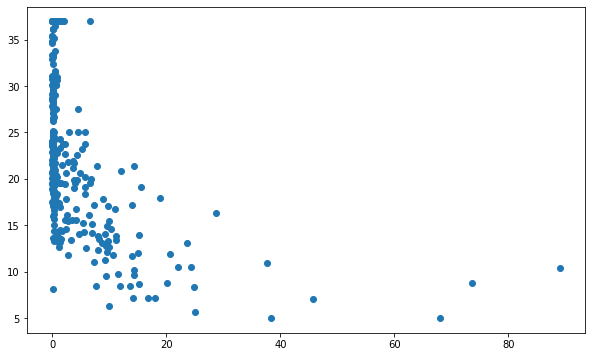

In [ ]:
#Recuerda que scatter plot, es un diagrama de dispersion de los datos
#Estas graficando la preseleccion de datos que va ha servir para el entrenamiento

plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(X_train.CRIM, y_train)
plt.xlabel("", fontsize=18)
plt.ylabel("", rotation=0, fontsize=18)

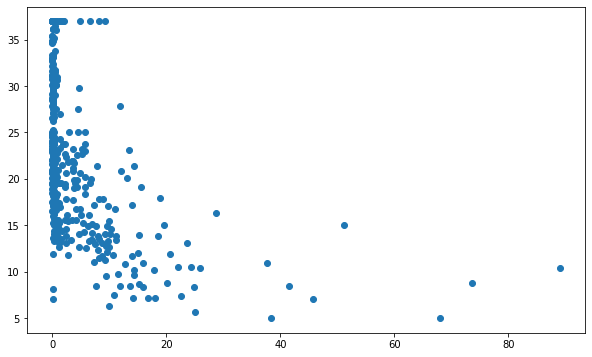

In [ ]:
#Compara con los datos antes de la preseleccion
plt.scatter(Data.CRIM,Data.MEDV)
plt.show()

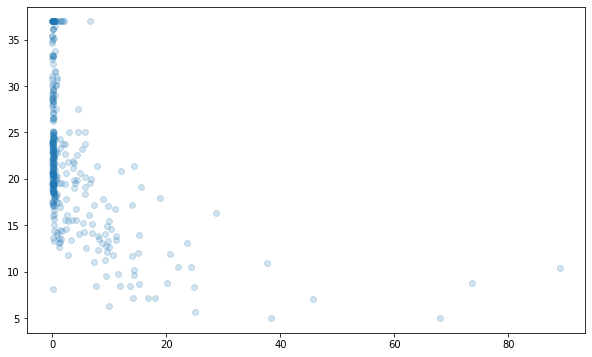

In [ ]:
#Podemos atenuar los valores que esten alejados de la media
plt.scatter(X_train.CRIM, y_train, alpha = 0.2)
plt.xlabel("", fontsize=18)
plt.ylabel("", rotation=0, fontsize=18)
plt.show()

In [ ]:
#Podemos observar todas las dispersiones de todas las variables
#scatter_matrix(X_train, figsize=(30, 20))

# Pre-selección de variables

In [10]:
# Dando formato a nuestra tabla resumen
#Reset Index sirve para añadir la columna inicial por defecto como un index adicional

pdResume = X_train.describe().transpose()
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max
0,CHAS,340.0,0.079412,0.270779,0.00000,0.000000,0.00000,0.00000,1.0000
1,DIS,354.0,3.716495,2.029466,1.17420,2.080825,3.14230,5.00235,12.1265
2,PTRATIO,354.0,18.375706,2.194308,12.60000,17.000000,18.80000,20.20000,21.2000
3,B,354.0,359.774096,86.869592,3.50000,376.602500,391.95500,396.90000,396.9000
4,CRIM,342.0,3.746143,9.304820,0.00632,0.082492,0.25293,3.48152,88.9762
5,TAX,354.0,402.813559,167.121147,187.00000,277.000000,330.00000,666.00000,711.0000
6,NOX,354.0,0.557487,0.119214,0.38500,0.453000,0.53800,0.64700,0.8710
7,LSTAT,339.0,12.945015,7.195009,1.73000,7.435000,11.74000,17.10000,36.9800
8,RAD,354.0,9.398305,8.589281,1.00000,4.000000,5.00000,20.00000,24.0000
9,INDUS,338.0,11.082751,6.868390,0.46000,5.130000,9.69000,18.10000,27.7400


In [11]:
#Se realiza un calculo de la tasa de datos faltantes
#X train toma el tamaño de la variable MEDV 354 datos de 506
#Y calcula cada una de los features respecto al total de datos de X train
pdResume[['missing_rate']] = 1 - pdResume[['count']]/X_train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)

pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
9,INDUS,338.0,11.082751,6.868390,0.46000,5.130000,9.69000,18.10000,27.7400,0.045198
7,LSTAT,339.0,12.945015,7.195009,1.73000,7.435000,11.74000,17.10000,36.9800,0.042373
10,AGE,339.0,69.912094,27.237846,6.20000,48.350000,78.10000,94.65000,100.0000,0.042373
11,ZN,339.0,10.228614,21.895227,0.00000,0.000000,0.00000,6.25000,95.0000,0.042373
0,CHAS,340.0,0.079412,0.270779,0.00000,0.000000,0.00000,0.00000,1.0000,0.039548
4,CRIM,342.0,3.746143,9.304820,0.00632,0.082492,0.25293,3.48152,88.9762,0.033898
1,DIS,354.0,3.716495,2.029466,1.17420,2.080825,3.14230,5.00235,12.1265,0.000000
2,PTRATIO,354.0,18.375706,2.194308,12.60000,17.000000,18.80000,20.20000,21.2000,0.000000
3,B,354.0,359.774096,86.869592,3.50000,376.602500,391.95500,396.90000,396.9000,0.000000
5,TAX,354.0,402.813559,167.121147,187.00000,277.000000,330.00000,666.00000,711.0000,0.000000


In [12]:
# Calculando las correlaciones de todas las variables con el target

temp = X_train.copy()
temp['target'] = y_train

correlations = []
for col in features:
  correlations.append(temp[[col, 'target']].corr().iloc[0][1])

In [13]:
# Cruzando correlaciones con la tabla de resumen original

pdres_cor = pd.DataFrame({'feature' : features, 'corr_MEDV' : correlations})
pdResume2 = pd.merge(pdResume, pdres_cor, on = 'feature')
pdResume2

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV
0,INDUS,338.0,11.082751,6.868390,0.46000,5.130000,9.69000,18.10000,27.7400,0.045198,-0.583926
1,LSTAT,339.0,12.945015,7.195009,1.73000,7.435000,11.74000,17.10000,36.9800,0.042373,-0.801852
2,AGE,339.0,69.912094,27.237846,6.20000,48.350000,78.10000,94.65000,100.0000,0.042373,-0.464973
3,ZN,339.0,10.228614,21.895227,0.00000,0.000000,0.00000,6.25000,95.0000,0.042373,0.400280
4,CHAS,340.0,0.079412,0.270779,0.00000,0.000000,0.00000,0.00000,1.0000,0.039548,0.136578
5,CRIM,342.0,3.746143,9.304820,0.00632,0.082492,0.25293,3.48152,88.9762,0.033898,-0.471689
6,DIS,354.0,3.716495,2.029466,1.17420,2.080825,3.14230,5.00235,12.1265,0.000000,0.332736
7,PTRATIO,354.0,18.375706,2.194308,12.60000,17.000000,18.80000,20.20000,21.2000,0.000000,-0.561794
8,B,354.0,359.774096,86.869592,3.50000,376.602500,391.95500,396.90000,396.9000,0.000000,0.360658
9,TAX,354.0,402.813559,167.121147,187.00000,277.000000,330.00000,666.00000,711.0000,0.000000,-0.585974


In [14]:
pdResume2['abs_corr_MEDV'] = pdResume2.corr_MEDV.apply(lambda x: abs(x))
pdResume2.sort_values(by = 'abs_corr_MEDV', ascending = False, inplace=True)

pdResume2


,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV
1,LSTAT,339.0,12.945015,7.195009,1.73000,7.435000,11.74000,17.10000,36.9800,0.042373,-0.801852,0.801852
12,RM,354.0,6.276766,0.705929,3.56100,5.878250,6.18500,6.60175,8.7250,0.000000,0.722248,0.722248
9,TAX,354.0,402.813559,167.121147,187.00000,277.000000,330.00000,666.00000,711.0000,0.000000,-0.585974,0.585974
0,INDUS,338.0,11.082751,6.868390,0.46000,5.130000,9.69000,18.10000,27.7400,0.045198,-0.583926,0.583926
7,PTRATIO,354.0,18.375706,2.194308,12.60000,17.000000,18.80000,20.20000,21.2000,0.000000,-0.561794,0.561794
10,NOX,354.0,0.557487,0.119214,0.38500,0.453000,0.53800,0.64700,0.8710,0.000000,-0.503978,0.503978
11,RAD,354.0,9.398305,8.589281,1.00000,4.000000,5.00000,20.00000,24.0000,0.000000,-0.503973,0.503973
5,CRIM,342.0,3.746143,9.304820,0.00632,0.082492,0.25293,3.48152,88.9762,0.033898,-0.471689,0.471689
2,AGE,339.0,69.912094,27.237846,6.20000,48.350000,78.10000,94.65000,100.0000,0.042373,-0.464973,0.464973
3,ZN,339.0,10.228614,21.895227,0.00000,0.000000,0.00000,6.25000,95.0000,0.042373,0.400280,0.400280


In [15]:
# Guardando resultados
pdResume2.to_csv('univariate_assesment.csv', index = 0)

In [16]:
Data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.453385
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.408256
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.559982
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.152562
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.506508
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.676180
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.467946
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.329166
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.452700
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.543556


In [17]:

#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_assesment.csv')
univariate_II.head()


,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV
0,LSTAT,339.0,12.945015,7.195009,1.730,7.43500,11.740,17.10000,36.980,0.042373,-0.801852,0.801852
1,RM,354.0,6.276766,0.705929,3.561,5.87825,6.185,6.60175,8.725,0.000000,0.722248,0.722248
2,TAX,354.0,402.813559,167.121147,187.000,277.00000,330.000,666.00000,711.000,0.000000,-0.585974,0.585974
3,INDUS,338.0,11.082751,6.868390,0.460,5.13000,9.690,18.10000,27.740,0.045198,-0.583926,0.583926
4,PTRATIO,354.0,18.375706,2.194308,12.600,17.00000,18.800,20.20000,21.200,0.000000,-0.561794,0.561794


# Calculamos los OUTLIERS

In [18]:
upper_limiter, lower_limiter =find_outlier(Data,'MEDV',1.5)

In [20]:
univariate_II['min_ric'] =lower_limiter
univariate_II['max_ric'] =upper_limiter

In [21]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tric'] = X_train[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_train.head()


,CHAS,DIS,PTRATIO,B,CRIM,TAX,NOX,LSTAT,RAD,INDUS,...,INDUS_tric,PTRATIO_tric,NOX_tric,RAD_tric,CRIM_tric,AGE_tric,ZN_tric,B_tric,DIS_tric,CHAS_tric
385,0.0,1.4261,20.2,396.90,16.81180,666,0.700,30.81,24,18.10,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
13,0.0,4.7075,21.0,396.90,0.62976,307,0.538,8.26,4,8.14,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
221,1.0,3.0480,17.4,395.24,0.40771,307,0.507,21.46,8,6.20,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
290,0.0,5.1167,19.2,396.90,0.03502,245,0.411,3.33,4,4.95,...,28.9875,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,36.9625,28.9875,28.9875
193,0.0,6.2196,15.6,393.37,0.02187,265,0.401,5.03,1,2.93,...,28.9875,28.9875,28.9875,28.9875,28.9875,NaN,36.9625,36.9625,28.9875,28.9875


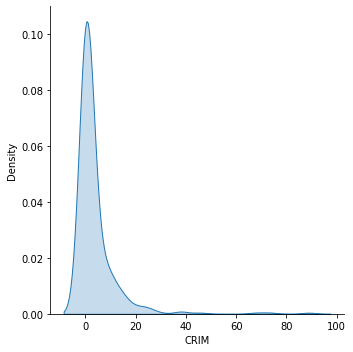

In [ ]:
sbn.displot(X_train, x = "CRIM", kind="kde", fill=True)

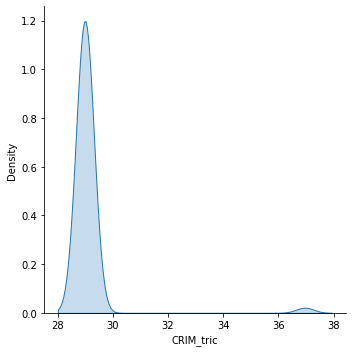

In [ ]:
sbn.displot(X_train, x = "CRIM_tric", kind="kde", fill=True)


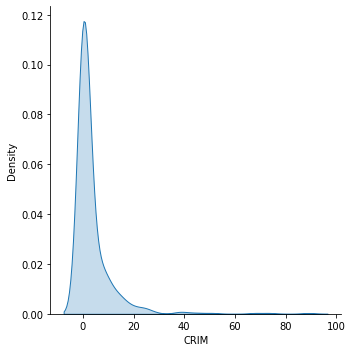

In [ ]:
sbn.displot(Data['CRIM'],kind="kde", fill=True)

# Tratamiento de MISSINGS

In [22]:
all_features = X_train.columns.tolist()

In [23]:
# Trataiento de missings

X_train[[x + '_imp' for x in all_features]] = X_train[all_features].fillna(X_train[all_features].median())

In [25]:
X_train[[x + '_imp' for x in all_features]].head(30)

,CHAS_imp,DIS_imp,PTRATIO_imp,B_imp,CRIM_imp,TAX_imp,NOX_imp,LSTAT_imp,RAD_imp,INDUS_imp,...,INDUS_tric_imp,PTRATIO_tric_imp,NOX_tric_imp,RAD_tric_imp,CRIM_tric_imp,AGE_tric_imp,ZN_tric_imp,B_tric_imp,DIS_tric_imp,CHAS_tric_imp
385,0.0,1.4261,20.2,396.90,16.81180,666,0.700,30.81,24,18.10,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
13,0.0,4.7075,21.0,396.90,0.62976,307,0.538,8.26,4,8.14,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
221,1.0,3.0480,17.4,395.24,0.40771,307,0.507,21.46,8,6.20,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
290,0.0,5.1167,19.2,396.90,0.03502,245,0.411,3.33,4,4.95,...,28.9875,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,36.9625,28.9875,28.9875
193,0.0,6.2196,15.6,393.37,0.02187,265,0.401,5.03,1,2.93,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,36.9625,36.9625,28.9875,28.9875
435,0.0,2.1247,20.2,109.85,11.16040,666,0.740,23.27,24,18.10,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
339,0.0,4.8122,20.2,396.90,0.05497,224,0.515,9.74,5,5.19,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
172,0.0,2.5961,16.6,396.90,0.13914,296,0.510,14.69,5,4.05,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
230,0.0,3.6715,17.4,378.35,0.53700,307,0.504,11.65,8,6.20,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
334,0.0,6.4584,20.2,389.40,0.03738,224,0.515,6.75,5,5.19,...,28.9875,28.9875,28.9875,28.9875,28.9875,36.9625,28.9875,36.9625,28.9875,28.9875
